# NLP Lab course exercise 1
### Gergo Szita (2974092)

In [21]:
# importing the required libraries, packages
# Creating useful functions for further work

import  nltk
from  nltk  import  word_tokenize, pos_tag
# download NLTK data
nltk.download('all')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


def getTrainAndTest(tagged_sents):
    ratio = int(len(tagged_sents) * 0.8)
    train_sents = tagged_sents[:ratio]
    test_sents = tagged_sents[ratio:]
    
    return (train_sents, tagged_sents)


def untag(tagged_sents):
    return [w for w, t in tagged_sents]


def transform_to_dataset(tagged_sents):
    X,y = [],[]
    for tagged in tagged_sents:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])

    return X,y

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/gergo/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/gergo/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/gergo/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /home/gergo/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/gergo/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/gergo/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]   

# Creating the three different Corpus

In [42]:
nltk.download('brown')
from nltk.corpus import brown

X1 = nltk.corpus.treebank

# hungarian corpus creation
def w2t(token):
    token_split=token.split("/")
    return(token_split[1],token_split[2])
        

checked = open("/home/gergo/Documents/NLP/mnsz_minta.elemzett", encoding="utf8").readlines()
    
taggedcorp=[]
for sentence in checked:
    taggedcorp.append([w2t(w) for w in sentence.strip().split()])

X3 = taggedcorp


X1_tagged_sents = X1.tagged_sents()
X1_train_sents, X1_test_sents  = getTrainAndTest(X1_tagged_sents)

X2_tagged_sents = brown.tagged_sents(categories='news')
X2_train_sents, X2_test_sents  = getTrainAndTest(X2_tagged_sents)

X3_train_sents, X3_test_sents  = getTrainAndTest(X3)

[nltk_data] Downloading package brown to /home/gergo/nltk_data...
[nltk_data]   Package brown is already up-to-date!


# Model 1

In [43]:
# Feature selection for a good POS tagger model

def features(sentence, index):
    """ sentence: list[w1, w2, ...], index: the index number of the word starting with 0 """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'is_numeric': sentence[index].isdigit(),
        'prev_is_digit': False if index == 0 else sentence[index - 1].isdigit(),
        'next_is_digit': False if index == len(sentence) - 1 else sentence[index + 1].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:],
        'length': len(sentence[index]),
        'next_length': 0 if index == 0 else sentence[index - 1],
        'prev_length': 0 if index == len(sentence) - 1 else sentence[index + 1],
        
    }


# Creating the two lists of training and data set for scikitlearn

# X1 model 1
X, y = transform_to_dataset(X1_train_sents)

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

size=10000

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', MultinomialNB())
])
clf.fit(X[:size], y[:size])
 
print('training OK')
 
X1_test, y1_test = transform_to_dataset(X1_test_sents)

# For plotting later
modelNames_X1 = []
Accuracies_X1 = []


modelNames_X2 = []
Accuracies_X2 = []

Accuracy_X1 = clf.score(X_test1, y_test1)

modelNames_X1.append('Model 1')
Accuracies_X1.append(Accuracy_X1)

print("Accuracy:", Accuracy_X1 )

# X2 model 1
X, y = transform_to_dataset(X2_train_sents)

size=10000

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', MultinomialNB())
])
clf.fit(X[:size], y[:size])
 
print('training OK')

X2_test, y2_test = transform_to_dataset(X2_test_sents)
Accuracy_X2 = clf.score(X2_test, y2_test)




training OK
Accuracy: 0.8453016617595689
training OK


MemoryError: 

# Model 2

In [44]:


#Pretrained Pos tagger model accuracy
Pretrained_tagger = nltk.data.load('taggers/maxent_treebank_pos_tagger/english.pickle')

predictX1 = Pretrained_tagger.evaluate(X1_tagged_sents)
print (predictX1)

modelNames_X1.append('Model 2')
Accuracies_X1.append(predictX1) 

predictX2 = Pretrained_tagger.evaluate(X2_tagged_sents)
print (predictX2)

modelNames_X2.append('Model 2')
Accuracies_X2.append(predictX2)



0.9956891414041082
0.5735127394235933


In [45]:
print(modelNames_X1, modelNames_X2)
print(Accuracies_X1,Accuracies_X2)

['Model 1', 'Model 2'] ['Model 2']
[0.8453016617595689, 0.9956891414041082] [0.5735127394235933]


# Model 3

In [46]:
from nltk.corpus import brown
from nltk import DefaultTagger as df
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt
from nltk import TrigramTagger as tg

patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]


def_model = nltk.DefaultTagger('NN')
uni_model = nltk.UnigramTagger(X1_train_sents)
bi_model = nltk.BigramTagger(X1_train_sents)
tri_model = nltk.TrigramTagger(X1_train_sents)
regexp_model = nltk.RegexpTagger(patterns)

# Combined taggers
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(X1_train_sents, backoff=t0)
t2 = nltk.BigramTagger(X1_train_sents, backoff=t1)

modelNames_X1.append('Model 3.1')
Accuracies_X1.append(def_model.evaluate(X1_train_sents))

# performance of Unigram Tagger
modelNames_X1.append('Model 3.2')
Accuracies_X1.append(uni_model.evaluate(X1_train_sents))

# performance of Bigram Tagger
modelNames_X1.append('Model 3.3')
Accuracies_X1.append(bi_model.evaluate(X1_train_sents))

# performance of Trigram Tagger
modelNames_X1.append('Model 3.4')
Accuracies_X1.append(tri_model.evaluate(X1_train_sents))

# performance of Regex Tagger
modelNames_X1.append('Model 3.5')
Accuracies_X1.append(regexp_model.evaluate(X1_train_sents))

# performance of Combined Tagger
modelNames_X1.append('Model 3.6')
Accuracies_X1.append(t2.evaluate(X1_train_sents))

##### Next Corpus

def_model = nltk.DefaultTagger('NN')
uni_model = nltk.UnigramTagger(X2_train_sents)
bi_model = nltk.BigramTagger(X2_train_sents)
tri_model = nltk.TrigramTagger(X2_train_sents)
regexp_model = nltk.RegexpTagger(patterns)

# Combined taggers
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(X2_train_sents, backoff=t0)
t2 = nltk.BigramTagger(X2_train_sents, backoff=t1)

modelNames_X2.append('Model 3.1')
Accuracies_X2.append(def_model.evaluate(X2_train_sents))

# performance of Unigram Tagger
modelNames_X2.append('Model 3.2')
Accuracies_X2.append(uni_model.evaluate(X2_train_sents))

# performance of Bigram Tagger
modelNames_X2.append('Model 3.3')
Accuracies_X2.append(bi_model.evaluate(X2_train_sents))

# performance of Trigram Tagger
modelNames_X2.append('Model 3.4')
Accuracies_X2.append(tri_model.evaluate(X2_train_sents))

# performance of Regex Tagger
modelNames_X2.append('Model 3.5')
Accuracies_X2.append(regexp_model.evaluate(X2_train_sents))

# performance of Combined Tagger
modelNames_X2.append('Model 3.6')
Accuracies_X2.append(t2.evaluate(X2_train_sents))







In [55]:
print(modelNames_X1, modelNames_X2)
print(Accuracies_X1,Accuracies_X2)
print(len(modelNames_X1), len(modelNames_X2))
print(len(Accuracies_X1),len(Accuracies_X2))


['Model 1', 'Model 2', 'Model 3.1', 'Model 3.2', 'Model 3.3', 'Model 3.4', 'Model 3.5', 'Model 3.6'] ['Model 2', 'Model 3.1', 'Model 3.2', 'Model 3.3', 'Model 3.4', 'Model 3.5', 'Model 3.6']
[0.8453016617595689, 0.9956891414041082, 0.12729888264692388, 0.9597455262472562, 0.9118146756451753, 0.9085531455783326, 0.2138472413408237, 0.9857509579969493] [0.5735127394235933, 0.1334795413246444, 0.9359608998057523, 0.7912525847484179, 0.8273074754057271, 0.20493765273513379, 0.9740459928566952]
8 7
8 7
('Model 1', 'Model 2', 'Model 3.1', 'Model 3.2', 'Model 3.3', 'Model 3.4', 'Model 3.5', 'Model 3.6')


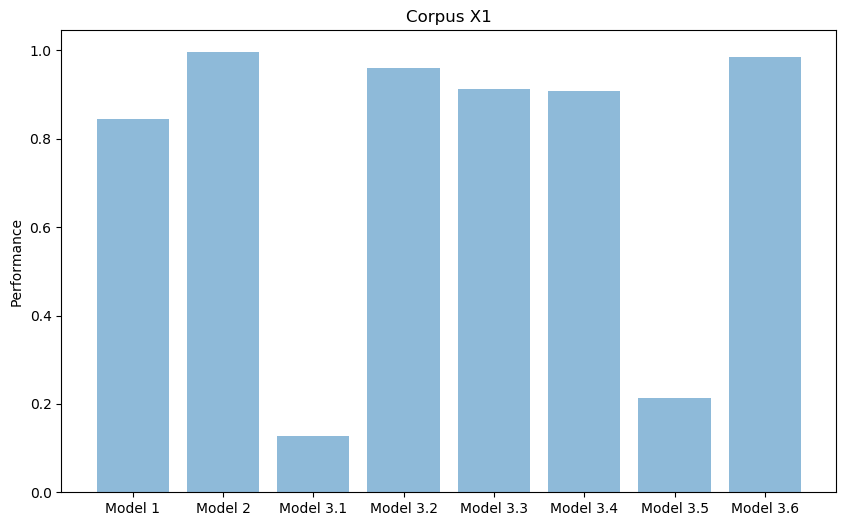

In [58]:
# Plotting the results
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

y_pos = np.arange(len(modelNames_X1))

plt.figure(figsize=(10,6))
plt.bar(y_pos, Accuracies_X1, align='center', alpha=0.5, width = 0.8)
plt.xticks(y_pos, modelNames_X1)
plt.ylabel('Performance')
plt.title('Corpus X1')
 
plt.show()

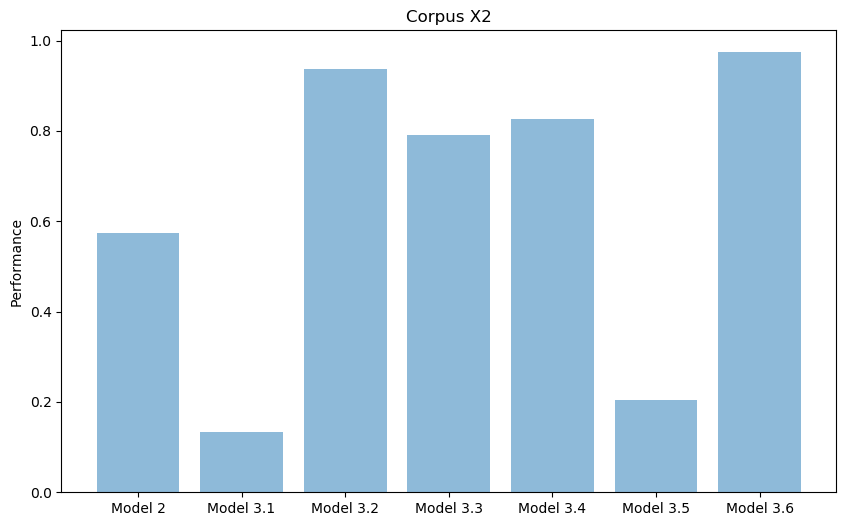

In [61]:
# Plotting the results
y_pos = np.arange(len(modelNames_X2))

plt.figure(figsize=(10,6))
plt.bar(y_pos, Accuracies_X2, align='center', alpha=0.5, width = 0.8)
plt.xticks(y_pos, modelNames_X2)
plt.ylabel('Performance')
plt.title('Corpus X2')
 
plt.show()

# Model 4 with hungarian

In [62]:
# Creating the test set ans the training set

X, y = transform_to_dataset(X3_train_sents)

size=10000

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', MultinomialNB())
])
clf.fit(X[:size], y[:size])
 
print('training OK')
 
X_test, y_test = transform_to_dataset(X3_test_sents)

modelNamesX3 = []
AccuracyX3 = []
modelNamesX3.append('Model 4.1')
AccuracyX3.append(clf.score(X_test, y_test))

print("Accuracy:", clf.score(X_test, y_test))

# Model 2

size=10000

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
])
clf.fit(X[:size], y[:size])
 
print('training OK')

 
X_test, y_test = transform_to_dataset(X3_test_sents)
 
print("Accuracy:", clf.score(X_test, y_test))
modelNamesX3.append('Model 4.2')
AccuracyX3.append(clf.score(X_test, y_test))


training OK
Accuracy: 0.6038883519981809
training OK
Accuracy: 0.8221817975100904


In [67]:
import sys
sys.path.insert(0, r'/home/gergo/Documents/NLP/RDRPOSTagger-python-3-master/pSCRDRtagger')

import RDRPOSTagger as rpt

def tagged_tuples(tagged_str):
    tagged_tuples = []
    for t in tagged_str.split():
        x, y = t.split('/')
        tagged_tuples.append((x,y))
    
    return tagged_tuples

r = rpt.RDRPOSTagger()
r.constructSCRDRtreeFromRDRfile("../Models/UniPOS/UD_Hungarian/train.uniPOS.RDR")
DICT = rpt.readDictionary("../Models/UniPOS/UD_Hungarian/train.uniPOS.DICT")

t = r.tagRawSentence(DICT, "Alma van azon a helyen")

print("Tagged Sentence in Hungarian: ",tagged_tuples(t))

FileNotFoundError: [Errno 2] No such file or directory: './pSCRDRtagger'

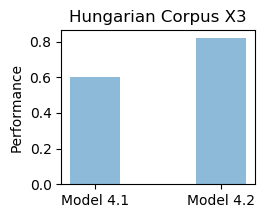

In [71]:
 
y_pos = np.arange(len(modelNamesX3))

plt.figure(figsize=(2.5,2))
plt.bar(y_pos, AccuracyX3, align='center', alpha=0.5, width = 0.4)
plt.xticks(y_pos, modelNamesX3)
plt.ylabel('Performance')
plt.title('Hungarian Corpus X3')
 
plt.show()